In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

# Load Data


In [3]:
df = pd.read_csv('data.csv')
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [4]:
df.dropna( inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15050 entries, 5 to 29998
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  15050 non-null  object 
 1   Name                         15050 non-null  object 
 2   Gender                       15050 non-null  object 
 3   Age                          15050 non-null  int64  
 4   Income (USD)                 15050 non-null  float64
 5   Income Stability             15050 non-null  object 
 6   Profession                   15050 non-null  object 
 7   Type of Employment           15050 non-null  object 
 8   Location                     15050 non-null  object 
 9   Loan Amount Request (USD)    15050 non-null  float64
 10  Current Loan Expenses (USD)  15050 non-null  float64
 11  Expense Type 1               15050 non-null  object 
 12  Expense Type 2               15050 non-null  object 
 13  Dependents           

# Encodeing


In [8]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
for i in df.select_dtypes(['object']).columns:
    df[i] = labelEncoder.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15050 entries, 5 to 29998
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  15050 non-null  int64  
 1   Name                         15050 non-null  int64  
 2   Gender                       15050 non-null  int64  
 3   Age                          15050 non-null  int64  
 4   Income (USD)                 15050 non-null  float64
 5   Income Stability             15050 non-null  int64  
 6   Profession                   15050 non-null  int64  
 7   Type of Employment           15050 non-null  int64  
 8   Location                     15050 non-null  int64  
 9   Loan Amount Request (USD)    15050 non-null  float64
 10  Current Loan Expenses (USD)  15050 non-null  float64
 11  Expense Type 1               15050 non-null  int64  
 12  Expense Type 2               15050 non-null  int64  
 13  Dependents           

# Normalization


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(df))


MinMaxScaler()


# Split Data


In [10]:
X = df.drop(columns=['Loan Sanction Amount (USD)'])
y = df['Loan Sanction Amount (USD)']
print("X Size: ", X.shape)
print("y Size: ", y.shape)

X Size:  (15050, 23)
y Size:  (15050,)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
print("X_train Size: ", X_train.shape)
print("X_test Size: ", X_test.shape)
print("y_train Size: ", y_train.shape)
print("y_test Size: ", y_test.shape)

X_train Size:  (10535, 23)
X_test Size:  (4515, 23)
y_train Size:  (10535,)
y_test Size:  (4515,)


# Feature Selection


In [16]:
from sklearn.feature_selection import SelectKBest, f_regression

kbest = SelectKBest(score_func=f_regression ,k=4).fit(X, y)

mask = kbest.get_support()
selected_features = X.columns[mask]

print("Selected columns:", mask)

Selected columns: [False False False False False False False False False  True  True False
 False False  True False False False False False False False  True]


# Model


In [13]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()
lrModel = linearRegression.fit(X_train, y_train)
lrModel

LinearRegression()

In [40]:
for i in df.select_dtypes(['float64']).columns:
    df[i] = df[i].astype(int)
X = df.drop(columns=['Loan Sanction Amount (USD)'])
y = df['Loan Sanction Amount (USD)']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)



from sklearn.neighbors import KNeighborsClassifier

kneighbors = KNeighborsClassifier()
knModel = kneighbors.fit(X_train, y_train)
knModel 

KNeighborsClassifier()

# Report


In [14]:
accuracy = lrModel.score(X_test, y_test)
print("Linear Regression Accuracy: ", accuracy)

Linear Regression Accuracy:  0.559287352612365


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, jaccard_score
y_pred = lrModel.predict(X_test)

print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R^2 Score: ", r2_score(y_test, y_pred))

Mean Absolute Error:  22502.136109596617
Mean Squared Error:  973170062.1943007
R^2 Score:  0.5593792831005366


In [58]:
accuracy = knModel.score(X_test, y_test)
print("Linear Regression Accuracy: ", accuracy)

Linear Regression Accuracy:  0.30764119601328904


In [59]:
from sklearn.metrics import classification_report
y_pred = knModel.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -999       0.02      0.08      0.03        38
           0       0.42      0.88      0.57      1567
        4183       0.00      0.00      0.00         0
        4482       0.00      0.00      0.00         0
        4488       0.00      0.00      0.00         0
        4642       0.00      0.00      0.00         1
        4673       0.00      0.00      0.00         1
        4939       0.00      0.00      0.00         1
        5062       0.00      0.00      0.00         1
        5066       0.00      0.00      0.00         1
        5197       0.00      0.00      0.00         0
        5464       0.00      0.00      0.00         1
        5482       0.00      0.00      0.00         1
        5589       0.00      0.00      0.00         1
        5665       0.00      0.00      0.00         1
        5912       0.00      0.00      0.00         1
        6206       0.00      0.00      0.00         0
        6280       0.00    

/home/karthikeyan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/karthikeyan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/karthikeyan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/karthikey

# Cross-Validation


Mean Squared Error (MSE): 947263484.7186737
Mean Absolute Error (MAE): 22232.866646469964
R-squared (R²) Score: [0.56327155 0.56161652 0.59321467 0.56326215 0.59379366]


/home/karthikeyan/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/karthikeyan/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mean Squared Error (MSE): 2873026098.349568
Mean Absolute Error (MAE): 31561.462657807308
R-squared (R²) Score: [0.30199336 0.30598007 0.30730897 0.3076412  0.30431894]


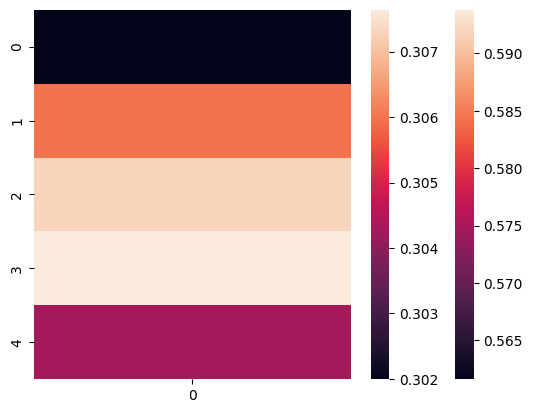

In [60]:
from sklearn.calibration import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def CrossValidation(model, X, y):
    cv_results = cross_validate(model, X, y, cv=5)

    cv_y_pred = cross_val_predict(model, X, y, cv=5)

    mse_scores = mean_squared_error(y, cv_y_pred)
    mae_scores = mean_absolute_error(y, cv_y_pred)
    r2_scores = cv_results['test_score']

    print("Mean Squared Error (MSE):", mse_scores)
    print("Mean Absolute Error (MAE):", mae_scores)
    print("R-squared (R²) Score:", r2_scores)

    sns.heatmap(np.reshape(r2_scores, (-1, 1)))
    
CrossValidation(linearRegression, X, y)
CrossValidation(kneighbors, X, y)


# Confusion Matrix


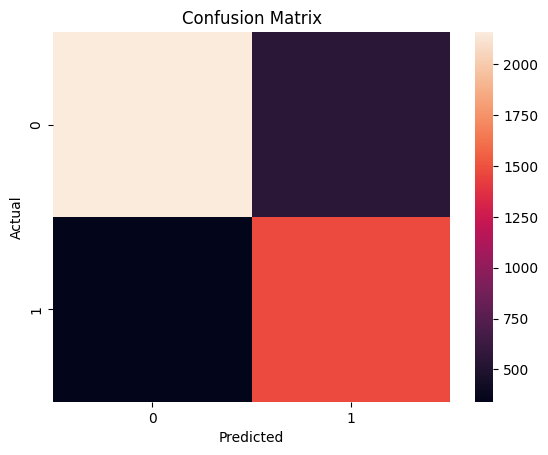

NameError: name 'kneighbors' is not defined

In [23]:
from sklearn.metrics import confusion_matrix

def ConfusionMatrix(model, X_train, X_test, y_train, y_test):
    trained_model = model.fit(X_train, y_train)
    y_pred = trained_model.predict(X_test)

    threshold = y_test.mean()
    y_test_class = (y_test > threshold).astype(int)
    y_pred_class = (y_pred > threshold).astype(int)

    cm = confusion_matrix(y_test_class, y_pred_class)
    sns.heatmap(cm)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

ConfusionMatrix(linearRegression, X_train, X_test, y_train, y_test)
ConfusionMatrix(kneighbors, X_train, X_test, y_train, y_test)

<Axes: >

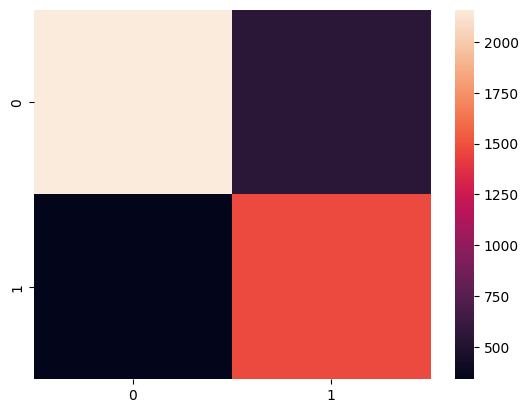

In [26]:
from sklearn.metrics import confusion_matrix

y_pred = lrModel.predict(X_test)

threshold = y_test.mean()
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)

sns.heatmap(confusion_matrix(y_test_class, y_pred_class))



# Principal Component Analysis (PCA) is a dimensionality reduction technique


Accuracy: 0.4017196071051654
Mean Absolute Error:  27724.410256239327
Mean Squared Error:  1321382642.3325984
R^2 Score:  0.4017196071051654


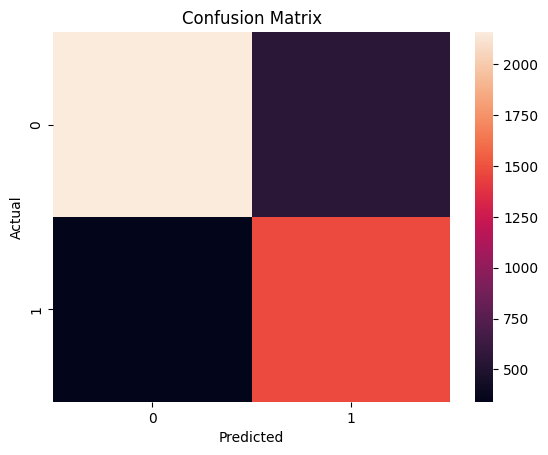

Accuracy: 0.301218161683278
Mean Absolute Error:  38860.19091915836
Mean Squared Error:  3509924548.282171
R^2 Score:  -0.5891831559634806


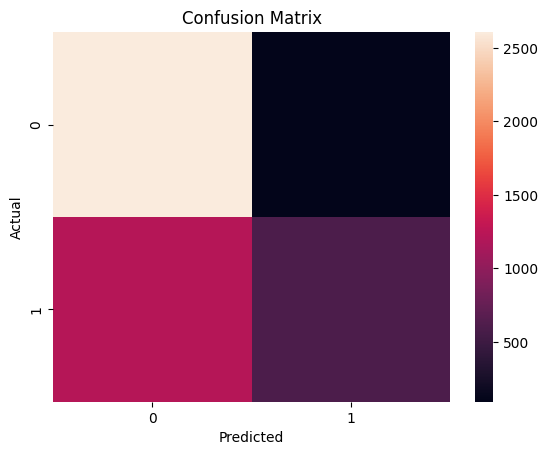

In [62]:
from sklearn.decomposition import PCA

def ModelUsingPCA(model, X_train, X_test, y_train, y_test):
    pca = PCA(n_components=2)
    
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    model.fit(X_train_pca, y_train)
    
    y_pred = model.predict(X_test_pca)
    
    accuracy = model.score(X_test_pca, y_test)
    print("Accuracy:", accuracy)
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("R^2 Score: ", r2_score(y_test, y_pred))
    ConfusionMatrix(model, X_train, X_test, y_train, y_test)
    
ModelUsingPCA(linearRegression,X_train, X_test, y_train, y_test)
ModelUsingPCA(kneighbors,X_train, X_test, y_train, y_test)

# ROC Curve


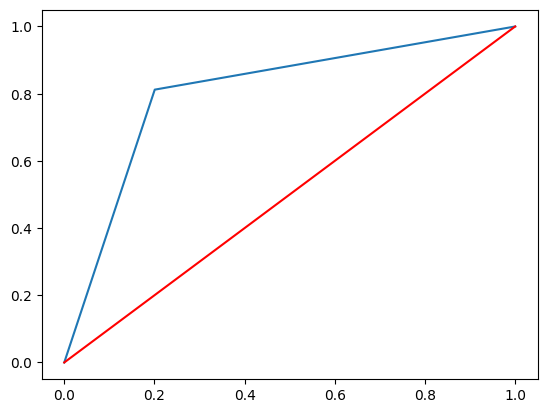

In [38]:

from sklearn import metrics

threshold = y_test.mean()
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)

fpr, tpr, thresholds = metrics.roc_curve(y_test_class, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='r')
plt.show()

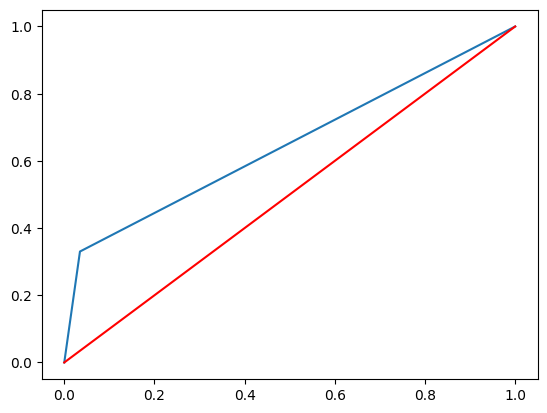

In [41]:

from sklearn import metrics

y_pred = knModel.predict(X_test)

threshold = y_test.mean()
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)

fpr, tpr, thresholds = metrics.roc_curve(y_test_class, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='r')
plt.show()